In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('mnist_train.csv')
data_test = pd.read_csv('mnist_test.csv')

In [ ]:
data



In [4]:
data.shape

(60000, 785)

In [14]:
data_df = pd.DataFrame(data)
data_test_df = pd.DataFrame(data_test)

In [6]:
data_df


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data_df.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [15]:
data_v = data_df.values
data_test_v = data_test.values

In [9]:
data_v

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
data_v.shape

(60000, 785)

In [20]:
X_data = data_v[:,1:]
Y_label = data_v[:,0]

X_test = data_test_v[:,1:]
Y_label_test = data_test_v[:,0]

In [56]:
def eucladian_dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def KNN(X,Y,querypt,K=5):
    V = []
    m = X.shape[0]
    for i in range(m):
        d = eucladian_dist(X[i],querypt)
        V.append((d,Y[i]))
    
    V = sorted(V)
    V = V[:K]
    V = np.array(V)
    V_freq = np.unique(V[:,1],return_counts=True)
    #print(V_freq)
    index = V_freq[1].argmax()
    pred = V_freq[0][index]
    #print(V[0][1])
    img = querypt.reshape(28,28)
    plt.imshow(img)
    plt.show()
    return pred

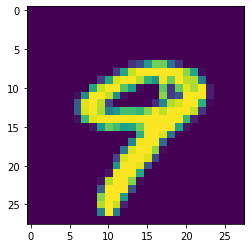

9
9


In [57]:
#let's test it by passing and testing the 3rd argument in the following function
pred = KNN(X_data,Y_label,X_test[9])
print(int(pred))

#cross check with:
print(Y_label_test[9])
